# Computer Vision Project: Unpaired Image-to-Image Translation with CycleGAN
**Authors: Kerr Tan, William Cheng, Zitong Luo**

## Install

In [1]:
# clone github repo
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
"""
%%capture
!pip install -r requirements.txt
"""

'\n%%capture\n!pip install -r requirements.txt\n'

## Datasets

**monet2photo**

In [4]:
"""
%%capture
%%bash
FILE=monet2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=monet2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**ukiyoe2photo**

In [5]:
"""
%%capture
%%bash
FILE=ukiyoe2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=ukiyoe2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**vangogh2photo**

In [6]:
"""
%%capture
%%bash
FILE=vangogh2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=vangogh2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**Datasets Showcase**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image

def load_train_images_from_datasets(base_path, styles):
    images = {}
    for col, style in enumerate(styles):
        trainA_dir = os.path.join(base_path, f"{style}/trainA")
        if os.path.exists(trainA_dir):
            trainA_files = [f for f in os.listdir(trainA_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainA_files:
                random_file = random.choice(trainA_files)
                img = np.array(Image.open(os.path.join(trainA_dir, random_file)))
                images[(0, col)] = img
        
        trainB_dir = os.path.join(base_path, f"{style}/trainB")
        if os.path.exists(trainB_dir):
            trainB_files = [f for f in os.listdir(trainB_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainB_files:
                random_file = random.choice(trainB_files)
                img = np.array(Image.open(os.path.join(trainB_dir, random_file)))
                images[(1, col)] = img
    return images

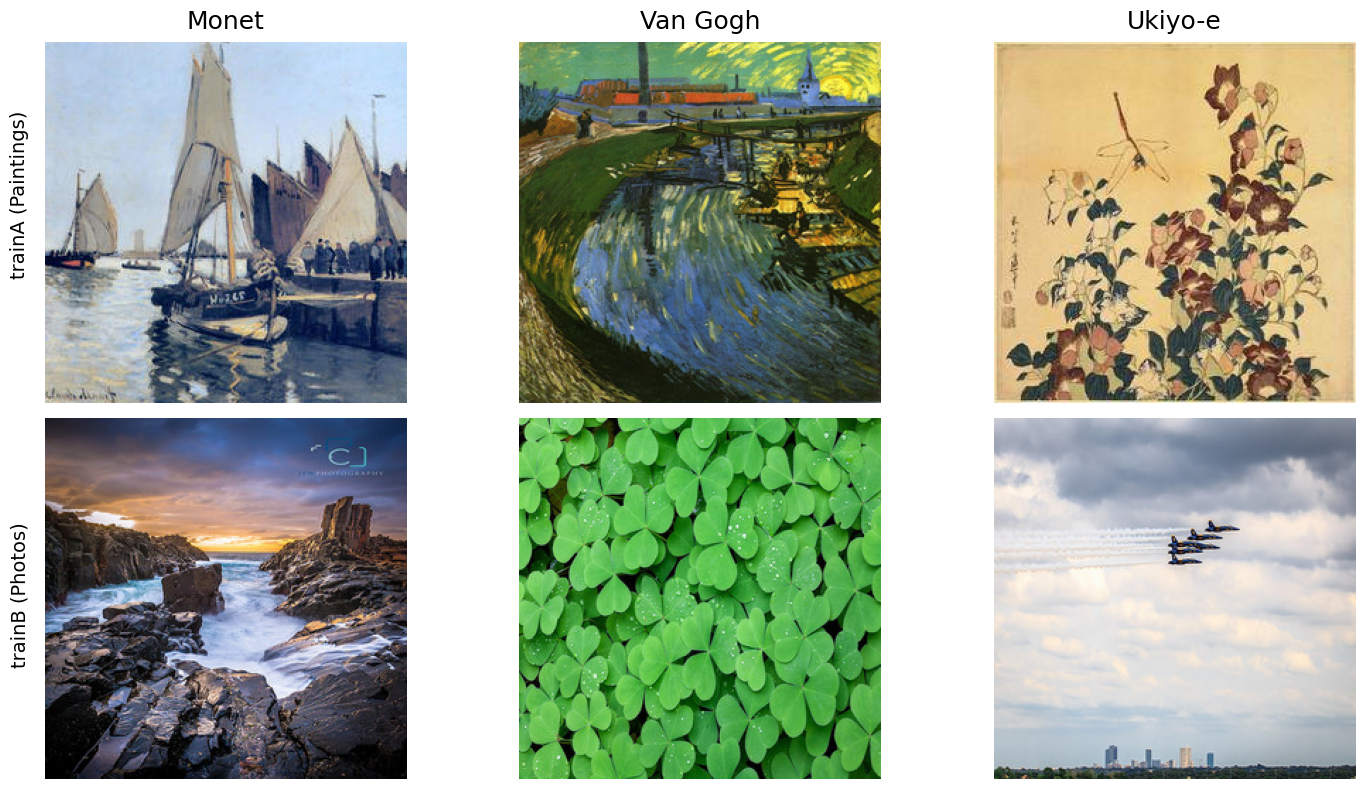

In [8]:
# define datasets styles for showcase
styles = ["monet2photo", "vangogh2photo", "ukiyoe2photo"]
style_names = ["Monet", "Van Gogh", "Ukiyo-e"]
row_labels = ["trainA (Paintings)", "trainB (Photos)"]
path = "./datasets"

images = load_train_images_from_datasets(path, styles)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, style in enumerate(style_names):
    axes[0, col].set_title(style, fontsize=18, pad=10)
for ax in axes.flatten():
    ax.axis('off')
for (row, col), img in images.items():
    axes[row, col].imshow(img)
fig.text(0.04, 0.75, 'trainA (Paintings)', va='center', rotation='vertical', fontsize=14)
fig.text(0.04, 0.25, 'trainB (Photos)', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()

## Pre-Trained Model

### Model Download

**monet2photo**

In [ ]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_monet
'''

**vangogh2photo**

In [ ]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_vangogh
'''

**ukiyoe2photo**

In [ ]:
'''
%%capture
!bash pytorch-CycleGAN-and-pix2pix/scripts/download_cyclegan_model.sh style_ukiyoe
'''

### Model loading 

In [9]:
import torch 
style_monet_model = torch.load('checkpoints/style_monet_pretrained/latest_net_G.pth')
style_vangogh_model = torch.load('checkpoints/style_vangogh_pretrained/latest_net_G.pth')
style_ukiyoe_model = torch.load('checkpoints/style_ukiyoe_pretrained/latest_net_G.pth')

### Model Prediction

**photo2monet fake**

In [14]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_monet_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**photo2vangogh fake**

In [15]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_vangogh_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**photo2ukiyoe fake**

In [16]:
!python pytorch-CycleGAN-and-pix2pix/test.py --dataroot pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB --name style_ukiyoe_pretrained --model test --no_dropout --gpu_ids -1

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: pytorch-CycleGAN-and-pix2pix/datasets/monet2photo/testB	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo

**Model Prediction showcase**

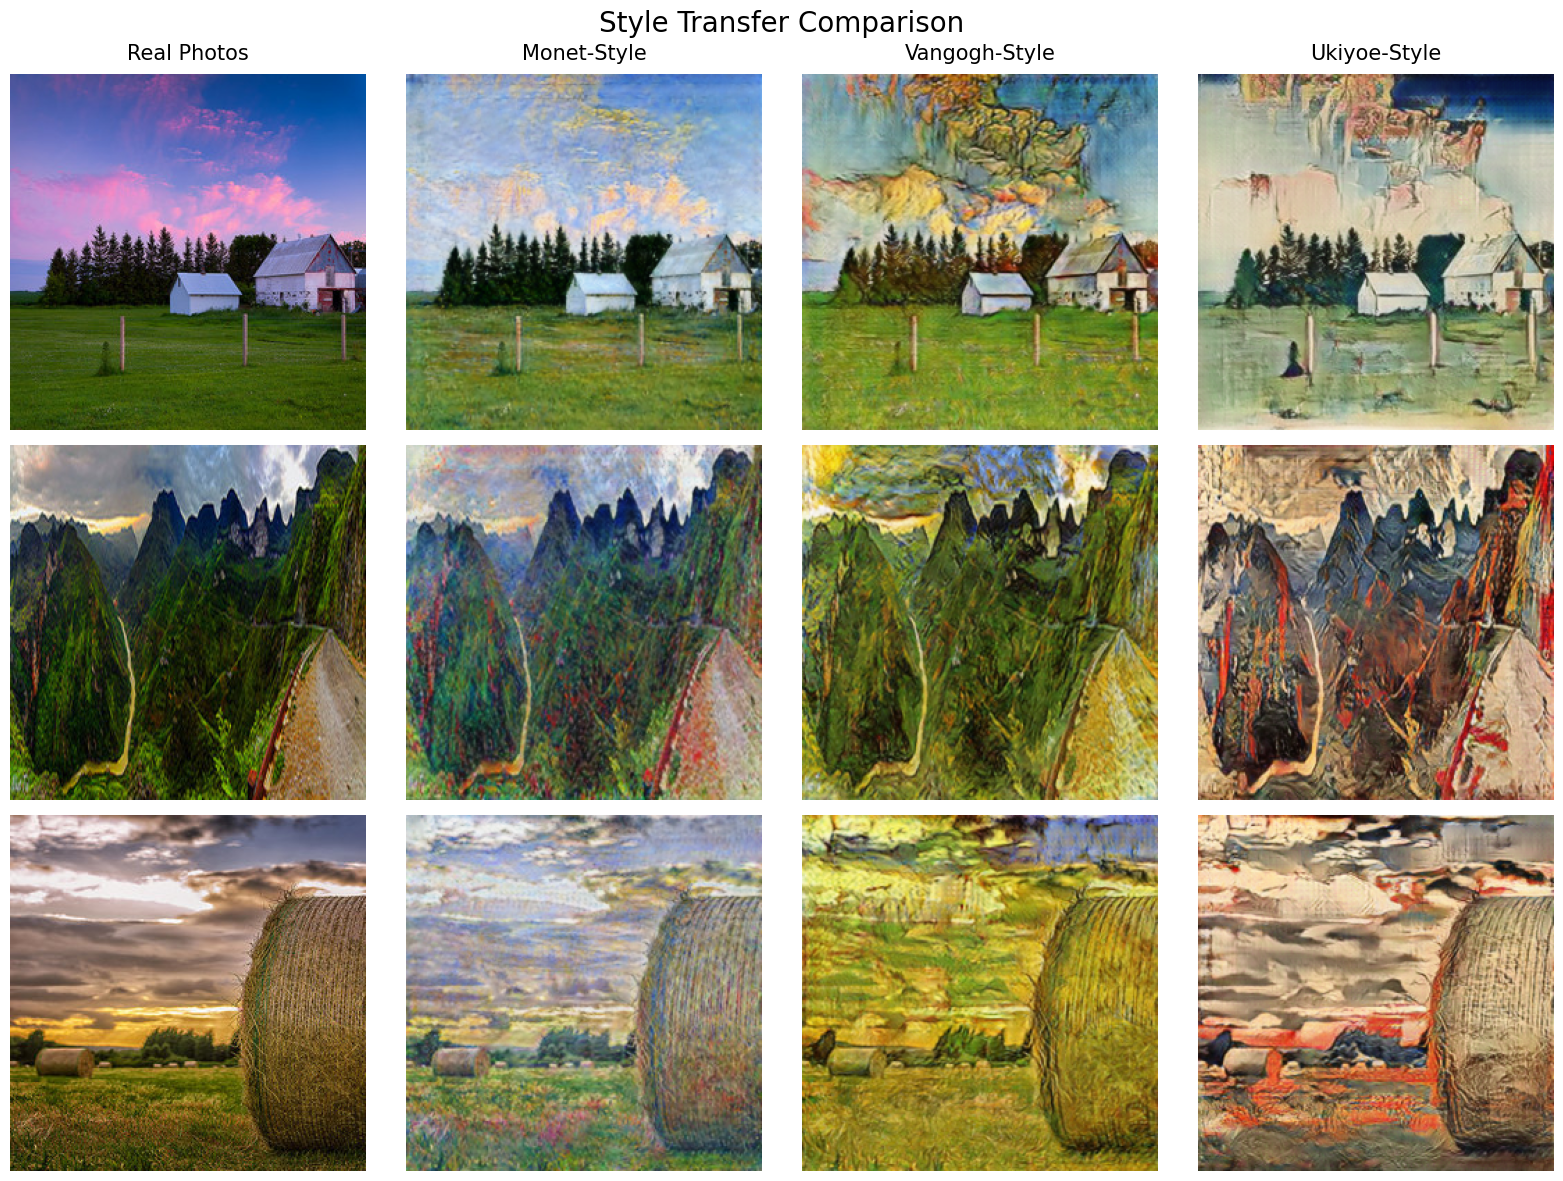

In [33]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define your styles and base folder
result_styles = ['style_monet_pretrained', 'style_vangogh_pretrained', 'style_ukiyoe_pretrained']
base_path = 'results/{}/test_latest/images'

# Get the list of real image filenames from one of the style folders
real_images_dir = base_path.format(result_styles[0])
all_files = os.listdir(real_images_dir)
real_filenames = sorted([f for f in all_files if f.endswith('_real.png')])

# Randomly select 3 unique real image filenames
selected_real_filenames = random.sample(real_filenames, 3)

# display
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
plt.subplots_adjust(wspace=0.05, hspace=0.05)
column_titles = ['Real Photos', 'Monet-Style', 'Vangogh-Style', 'Ukiyoe-Style']

for row_idx, real_filename in enumerate(selected_real_filenames):
    base_name = real_filename.replace('_real.png', '')

    # Real image
    real_img_path = os.path.join(real_images_dir, real_filename)
    img = Image.open(real_img_path)
    axs[row_idx, 0].imshow(img)
    axs[row_idx, 0].axis('off')
    if row_idx == 0:
        axs[row_idx, 0].set_title(column_titles[0], fontsize=15, pad=10)

    # Fake images from each style
    for col_idx, style in enumerate(result_styles):
        style_dir = base_path.format(style)
        fake_filename = f"{base_name}_fake.png"
        fake_img_path = os.path.join(style_dir, fake_filename)
        img = Image.open(fake_img_path)
        axs[row_idx, col_idx + 1].imshow(img)
        axs[row_idx, col_idx + 1].axis('off')
        if row_idx == 0:
            axs[row_idx, col_idx + 1].set_title(column_titles[col_idx + 1],fontsize=15, pad=10)

plt.suptitle("Style Transfer Comparison", fontsize=20)
plt.tight_layout()
plt.show()


## Experiment